# Lab assignment 1: Image recognition using deep networks
## Ben Harvey

In [54]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #preprocessing images

In [112]:
tf.__version__

'2.3.1'

In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7073811418593055255
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10262896144425735089
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 8360592425410274852
physical_device_desc: "device: XLA_GPU device"
]


# Exercise one: Identifying handwritten numbers

### Question 1:
Discuss with your group, then describe to your teacher, a list of applications where automatic recognition of hand-written numbers would be useful. (Question 1, 3 points)

**Answer:**
1. Fraud detection: paycheck in banks for example 
2. Digital scanner: recognition of text (physical) and transform to digital media (.doc .pdf ..) -> same principle of digits but for letters.



## Data Preparation 

In [128]:
#Load dataset MNIST (labelled handwritten numbers)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [129]:
#size and shape of training set / test set
print((x_train.shape))
print((x_test.shape))

(60000, 28, 28)
(10000, 28, 28)


In [130]:
#Reshape (from 60000x28x28 to 60000x784)
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))
print((x_train.shape))
print((x_test.shape))

(60000, 784)
(10000, 784)


In [131]:
#Rescale (valuews <0,1>)
x_train = x_train / 255 #0 = black = 255 = white
x_test = x_test / 255

In [132]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [133]:
#labeling
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[1])
print(y_test[1])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Model Definition

In [134]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(), metrics='accuracy')


## Training and Evaluation

In [138]:
history = model.fit(x_train, y_train, batch_size=128, 
                    epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.9260 - val_loss: 0.2832 - val_accuracy: 0.9243
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9270 - val_loss: 0.2783 - val_accuracy: 0.9258
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2596 - accuracy: 0.9279 - val_loss: 0.2763 - val_accuracy: 0.9275
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.9282 - val_loss: 0.2797 - val_accuracy: 0.9261
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2577 - accuracy: 0.9282 - val_loss: 0.2828 - val_accuracy: 0.9217
Epoch 6/12
375/375 [==============================] - 1s 1ms/step - loss: 0.2573 - accuracy: 0.9280 - val_loss: 0.2709 - val_accuracy: 0.9267
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2567 - accuracy: 0.9276 - val_loss: 0.2767 - val_accuracy: 0.9263
Epoch 

In [139]:
model.predict(x_test)

array([[8.1579373e-08, 4.3170315e-16, 3.0373033e-07, ..., 9.9867553e-01,
        1.9296876e-06, 3.1070266e-04],
       [5.9149629e-06, 2.7783511e-08, 9.9913979e-01, ..., 3.7357218e-23,
        5.5789910e-06, 1.9268823e-17],
       [3.4909314e-07, 9.9222410e-01, 3.5085627e-03, ..., 6.8495516e-04,
        1.7587238e-03, 1.0139421e-04],
       ...,
       [5.5542698e-10, 3.6720585e-10, 4.8984367e-07, ..., 2.8379125e-04,
        2.7686558e-03, 2.2222001e-02],
       [3.6423742e-11, 4.3814771e-10, 3.7271031e-10, ..., 6.6734118e-11,
        4.5656352e-03, 1.1009577e-08],
       [1.1598856e-09, 3.5516383e-16, 7.8640142e-07, ..., 9.2776981e-17,
        4.2967169e-10, 6.7949999e-14]], dtype=float32)

In [140]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Questions 2-6

1. Show your teacher the text from your console, with how long it took for each epoch to run and the training performance history. (Question 2, 5 points)
2. Plot the training history and show this to your teacher (Question 3, 3 points)
3. Discuss with your group, then describe to your teacher, how the accuracy on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model. (Question 4, 5 points).
4. Evaluate the model performance on the test set using the following command: loss, accuracy = model.evaluate(x_test, y_test, verbose=0) Show your teacher what values you get for the model’s accuracy and loss. (Question 5, 2 points)
5. Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification. (Question 6, 5 points) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


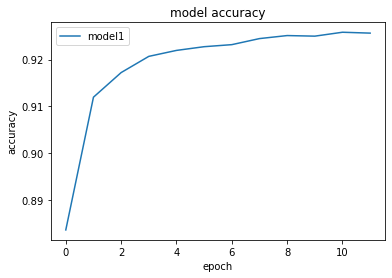

In [110]:
# Question 3:
#plot the models
print(history.history.keys()) #list the dict keys

#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'model1')

plt.legend()

#### Answer

Question 4. the progress in training set is greatly improving by each epoch, but the test_set is not so fast, on the other hand is already starts high.

In [108]:
#Question 5:
#Evaluating the model in test set
model.evaluate(x=x_test, y=y_test, verbose=0)


[0.27714982628822327, 0.9244999885559082]

### Question 6:
Image a bank that in 8% of the numbers put different balances on client account? So it is not sufficient

### Question 7:
Discuss with your group, then describe to your
teacher, how linear activation of units limits the possible computations this model can
perform. (Question 7, 5 points)

A = cx, derivative with respect to x is c. That means, the gradient has no relationship with X. It is a constant gradient and the descent is going to be on constant gradient. If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x) !!!
This is not that good!. There is another problem too. Think about connected layers. Each layer is activated by a linear function. That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function. No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer! Pause for a bit and think about it.
That means these two layers ( or N layers ) can be replaced by a single layer. Ah! We just lost the ability of stacking layers this way. No matter how we stack, the whole network is still equivalent to a single layer with linear activation ( a combination of linear functions in a linear manner is still another linear function ).

## Change Model Parameters

In [37]:
# Refit with activation funcion RELU (Non-linear)

In [147]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu')) #first hidden layer
model2.add(keras.layers.Dense(10, activation='softmax')) #output layer
model2.summary()

#compile
model2.compile(loss='categorical_crossentropy', 
               optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

#fit / trainning
history2 = model2.fit(x_train, y_train, batch_size=128, 
                    epochs=12, verbose=1, validation_split=0.2)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.9110 - val_loss: 0.1707 - val_accuracy: 0.9517
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.9581 - val_loss: 0.1245 - val_accuracy: 0.9639
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9709 - val_loss: 0.1144 - val_accuracy: 0.9672
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0757 - 

### Question 8: 
Plot the training history and show it to your teacher

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


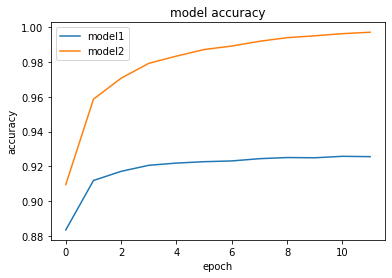

In [105]:
#plot the models
print(history.history.keys()) #list the dict keys

#Accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'model1')
plt.plot(history2.history['accuracy'], label ='model2')
plt.legend()



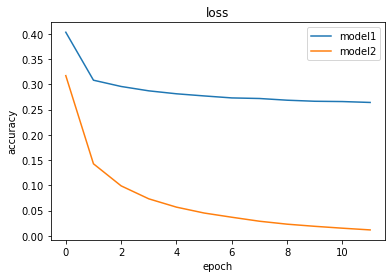

In [106]:
#loss
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label = 'model1')
plt.plot(history2.history['loss'], label ='model2')
plt.legend()

In [107]:
#Evaluating the model in test set
print(model.evaluate(x=x_test, y=y_test))
print(model2.evaluate(x=x_test, y=y_test))

313/313 [==============================] - 0s 395us/step - loss: 0.2771 - accuracy: 0.9245
[0.27714982628822327, 0.9244999885559082]
313/313 [==============================] - 0s 408us/step - loss: 0.0736 - accuracy: 0.9782
[0.07360856980085373, 0.9782000184059143]


### Question 9: 
Discuss with your group, then describe to your teacher, how this training history
differs from the previous model, for the training and validation sets. Describe what
this tells us about the generalisation of the model.

**Answer:**

The 2-model has a greater accuracy in test_validation and training set as well. When i use the test-set to evaluate the model, the accuracy falls, but even in very different set it keeps high accuracy (~98% vs 93%).

The first model as linear the performance dont change too much in train and test set, but the non-linear function improves it by almost 5%